# 19.2.1-2.1 - Build a Basic Neural Network

In [247]:
# Import our dependencies
import pandas as pd 
import matplotlib as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import sklearn as skl 
import tensorflow as tf 

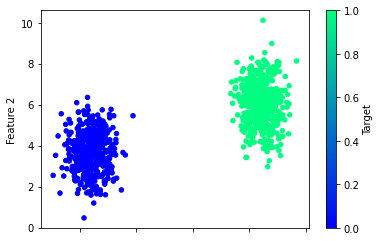

In [248]:
# Generate dummy dataset using Scikit-learn's make_blobs
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [249]:
# Use sklearn to split dataset into test_train_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=78)

**Transition** | Normalize/Standardize our Numerical Variables

Now that we have our training data, we need to prepare the dataset for our neural network model. As with any machine learning algorithm, it is crucial to normalize or standardize our numerical variables to ensure that our neural network does not focus on outliers and can apply proper weights to each input. In most cases, the more that input variables are normalized to the same scale, the more stable the neural network model is, and the better the neural network model will generalize. To normalize our dummy data, we'll add and run the following code to the notebook:

In [250]:
# Create a scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler on our X_Train
X_scaler.fit(X_train)

# Scale the date
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

**Transition** | Building the Neural Network

Finally, we have our data ready for our first neural network model! To create the neural network in our notebook, first we must create our Sequential model. To do this, we must add the following code to the notebook:

In [251]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

**Notable Moment** | Understanding the `nn_model`

The `nn_model` object will store the entire architecture of our neural network model. Our next step is to add our first layer, which will contain our inputs and a hidden layer of neurons.

Also, the Keras module does not have specific classes for input, hidden, and output layers. All layers are built using the Dense class, and the input and first hidden layer are always built in the same instance.

As we learned earlier, **we can add layers to our Sequential model using Keras' Dense class.** 

For our first layer, we need to define a few parameters:

- The `input_dim` parameter indicates how many inputs will be in the model (in this case two).
- The `units` parameter indicates how many neurons we want in the hidden layer (in this case one).
- The `activation` parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

Putting it all together:

In [252]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

**Transition** | Adding Another Layer

Now that we have our input and hidden layers built, we need to add an output layer.

We'll use the Dense class to tell our Sequential model what to do with the data. This time, we only need to supply the number of output neurons. For a classification model, we only want a yes or no binary decision; therefore, we only need one output neuron. In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a sigmoid activation function to produce a probability output. 

In [253]:
# Add the ouput layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

**_Drum roll please_** | Summary method

Now that we have added our layers to the Sequential model, we can double-check our model structure using the `summary()` method. 

In [254]:
# Check the structure of the model to confirm details
nn_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


**Understanding the nn_model.summary()** | Summary() explained

Note that the number of parameters in each layer does not equal the number of neurons we defined in the notebook. Remember, every layer has one additional input known as our bias term (or weighted constant).

## Compiling the Model

Now that we have our layers defined, we have to inform the model how it should train using the input data. The process of informing the model how it should learn and train is called **compiling** the model.



In [255]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

**Augments of .compile( ) Explained** | Explaining some of the line above

- As for the loss function, we'll use `binary_crossentropy`, which is specifically designed to evaluate a binary classification model.
- To enhance the performance of our classification neural network, we'll use the `adam` optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features.
- In addition to the optimization function and loss metric, we'll also add a more reader-friendly evaluation metric, which measures the quality of the machine learning model. There are two main types of evaluation metrics—the model predictive accuracy and model mean squared error (MSE). **We use _`accuracy` for classification models and `mse` for regression models_**. For model predictive accuracy, the higher the number the better, whereas for regression models, MSE should reduce to zero.

# 19.2.3 - Train and Test a Basic Neural Network

To train/fit our Keras model, we'll use the `fit` method and provide the x training values and y training values, as well as the number of epochs. Each epoch is a complete pass through the training data.

In [256]:
# Fit the model to the training data with epoch # as user input
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 715us/step - loss: 0.6264 - accuracy: 0.9987
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5641 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5503 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 967us/step - loss: 0.5298 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 843us/step - loss: 0.4979 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 1.0000
Epo

Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0899 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 916us/step - loss: 0.0907 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 996us/step - loss: 0.0889 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 974us/step - loss: 0.0852 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 840us/step - loss: 0.0880 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 952us/step - loss: 0.0851 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 903us/step - loss: 0.0882 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 923us/step - loss: 0.0810 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 855us/step - loss: 0.0826 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 795us/step - loss: 0.0805 -

**Summary** | Interpreting the output above

Looking at the model training output, we know that the loss metric was 0.07 and the predictive accuracy is 1.0. This means that although our model performance had more loss than the simulation data, the model correctly classifies all of our training data, which is sufficient for our needs. _Note that the model isn't seeded, meaning that the results in your notebook will likely not be identical to one in this example._

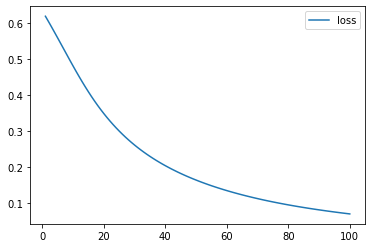

In [257]:
# Visualize our model's loss over the full 100 epochs

## Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

## Plot the loss
history_df.plot(y="loss")

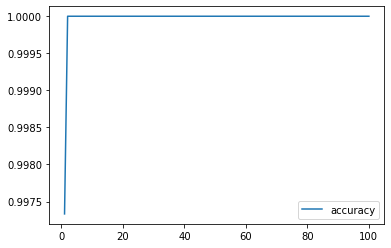

In [258]:
# Plot the accuracy over time using the same DataFrame
history_df.plot(y="accuracy")

**Summary** | Interpreting the output above

The neural network model took 20 to 30 epochs before it started to fit the training data with high success.

**Transition** | Evaluate the model's performance on the test data

Testing a neural network model in TensorFlow is very similar to testing a machine learning model in Scikit-learn. For our purposes, we'll use the `evaluate` method and print the testing loss and accuracy values.

In [259]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0647 - accuracy: 1.0000
Loss: 0.06468456983566284, Accuracy: 1.0


**Transition** | Using the Trained Model to Predict

Now that we have a trained neural network model and we have verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of a data point. In our Sequential model, we can use the predict method to generate predictions on new data. 

In [260]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

# 19.2.4 - Nuances of Neural Networks on Nonlinear Numbers

Now that we have built single-neuron, single-layer model, we will go on to building a single neuron, nonlinear model with more complex data.

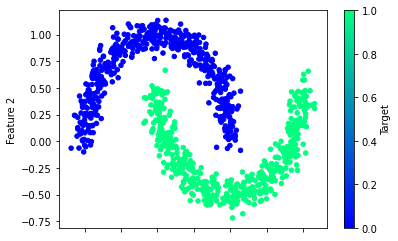

In [261]:
# Generate some nonlinear moon-shaped data using Scikit-learn's make_moons method 
# and visualize it using Pandas and Matplotlib.
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

**Next** | Making adjustments to the model

Since we are not changing the structure of our neural network, nor are we changing its function, we can use the same Sequential model object. **The only difference from our previous workflow is this time we will retrain and evaluate on the nonlinear moon-shaped data.**

In [262]:
# Split the nonlinear data into training and testing datasets and normalize our datasets

## Create the training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

## Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

## Fit the scaler
X_moon_scaler.fit(X_moon_train)

## Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled =X_moon_scaler.transform(X_moon_test)

**Next** | Training the Nonlinear Model

Train our neural network model using the fit method on the nonlinear training data.

In [263]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9546 - accuracy: 0.5160
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8284 - accuracy: 0.5453
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7460 - accuracy: 0.5813
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.6013
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6455 - accuracy: 0.6173
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6106 - accuracy: 0.6333
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.6547
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.6680
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.6760
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.6867
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2625 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2614 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2612 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2609 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2606 - accuracy: 0.8907
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.8907
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2600 - accuracy: 0.8907
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.8907
Epoch 93/100


In [264]:
nn_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


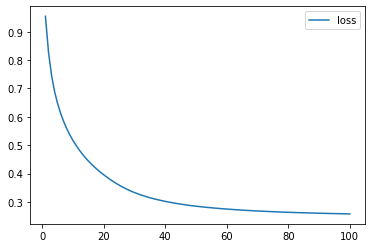

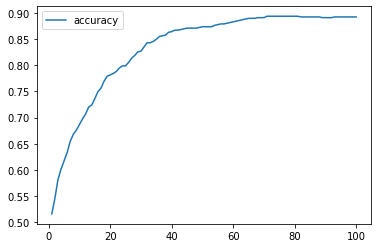

In [265]:
# Visualize our nonlinear model's loss and accuracy over the full 100 epochs

## Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

## Plot the loss
history_df.plot(y="loss")

## Plot the accuracy over time using the same DataFrame
history_df.plot(y="accuracy")

**Summary** | Interpreting the output above

TensorFlow stopped training the model after 84 epochs because the loss metric was no longer decreasing at a substantial rate, and the accuracy was not improving.

**Note** | Threshold Requirements

If we were trying to use a neural network model to separate left-handed people from right-handed people, a model that is correct 89% of the time is very accurate, and guessing incorrectly does not have a huge negative impact. However, in many industrial and medical use cases, a model's classification accuracy must exceed 95% or even 99%. In these cases, we wouldn't be satisfied with the basic single-neuron, single-layer neural network model, and we would have to design a more robust neural network. 

In summary, **the more complicated and nonlinear the dataset, the more components we'd need to add to a neural network to achieve our desired performance.**

# 19.2.5 - Create the Connective Tissue, the Multiple-Neuron Neural Network


Now that we have built (single-neuron, single-layer model)and a (single neuron, nonlinear model) with more complex data, we will move on to create a mulitple-neuron neural network.

**Pros & Cons** | Pros of multiple-neurons

Some of the advantages are as follow:

- There is a distributed effort to find optimal weights—faster.
- Each neuron can focus on different features to identify nonlinear effects—smarter.
- It is less likely to fixate on complex variables—more robust.

**Pros & Cons** | Cons/Limitations of multiple-neurons

There are two main reasons to limit the number of neurons in a neural network model: 
- overfitting 
- and computation resources. 

**Summary**

A neural network model with a large number of neurons requires equally large training dataset—training a large neural network requires more data, more epochs, and more time. Therefore, it is important that a neural network model has an appropriate number of neurons to match the size of the data, the complexity of the problem, and the amount of input neurons.

**Helpful Sidenote**

A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs.

In [266]:
# Generate our new Sequential model, but this time with with multiple neuron layers

## Generate model
new_model = tf.keras.models.Sequential()

Using our new Sequential model, we'll add our input, hidden, and output layers using the Dense class. However, this time we'll create a hidden layer with six neurons instead of one by changing the units parameter while keeping all other parameters the same.

In [267]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the model output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

**Transitioning** | Compiling

Compile and train the model using our nonlinear moon-shaped dummy data.

In [268]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7406 - accuracy: 0.5291
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5125
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6178 - accuracy: 0.5655
Epoch 4/100
24/24 [==============================] - 0s 903us/step - loss: 0.6076 - accuracy: 0.5580
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.6438
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5345 - accuracy: 0.6812
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.7449
Epoch 8/100
24/24 [==============================] - 0s 935us/step - loss: 0.4730 - accuracy: 0.7804
Epoch 9/100
24/24 [==============================] - 0s 977us/step - loss: 0.4465 - accuracy: 0.8163
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8285
Epo

24/24 [==============================] - 0s 997us/step - loss: 0.2219 - accuracy: 0.8974
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1977 - accuracy: 0.9128
Epoch 83/100
24/24 [==============================] - 0s 886us/step - loss: 0.2158 - accuracy: 0.9055
Epoch 84/100
24/24 [==============================] - 0s 925us/step - loss: 0.2056 - accuracy: 0.9090
Epoch 85/100
24/24 [==============================] - 0s 845us/step - loss: 0.1996 - accuracy: 0.9172
Epoch 86/100
24/24 [==============================] - 0s 873us/step - loss: 0.1982 - accuracy: 0.9180
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9013
Epoch 88/100
24/24 [==============================] - 0s 761us/step - loss: 0.1692 - accuracy: 0.9298
Epoch 89/100
24/24 [==============================] - 0s 872us/step - loss: 0.2016 - accuracy: 0.9181
Epoch 90/100
24/24 [==============================] - 0s 826us/step - loss: 0.2080 - accuracy: 0.90

**Summary** | Interpreting the output above

You may have noticed that adding multiple neurons to our neural network did not yield a perfect classification model. As input data becomes more complex, neural networks will require more and more optimization tweaks to achieve their desired accuracy.

# 19.2.6 - Give Your Model a Synaptic Boost

When a neural network model does not meet performance expectations, it is usually due to one of two causes: inadequate or inappropriate model design for a given dataset, or insufficient or ineffective training data. The most straightforward means of improving neural network performance is tweaking the model design and parameters.

**To avoid trapping ourselves in endless optimization iterations, we can use characteristics of our input data to determine what parameters should be changed.**

There are a few means of optimizing a neural network:

- Check out your input dataset.
- Add more neurons to a hidden layer.
- Add additional hidden layers.
- Use a different activation function for the hidden layers.
- Add additional epochs to the training regimen.

# 19.3.1 - Measure Twice, Model Once

**When building a computational model, most of the design effort is not writing code to build the complex model.** Rather, most of the effort in computational model building is preprocessing and cleaning up the input data. Neural networks are no exception to this rule. In fact, neural networks tend to require the most preprocessing of input data compared to all other statistical and machine learning models. This is because neural networks are really good at identifying patterns and trends in data; therefore, they are susceptible to getting stuck when looking at abstract or raw data. When data has many categorical values, or large gaps between numerical values, a neural network might think that these variables are less important (or more important) than they really are. As a result, the neural network may ignore other variables that should provide more meaningful information to the model.

Also, remember to scale data. Models will overemphasize numbers that are not put in relative terms, subsequently de-emphasizing other equally or more important variables.

# 19.3.2 - The Headache of Categorical Variables

For a neural network to understand and evaluate a categorical variable, we must preprocess the values using a technique called one-hot encoding. One-hot encoding identifies all unique column values and splits the single categorical column into a series of columns, each containing information about a single unique categorical value.

The process of reducing the number of unique categorical values in a dataset is known as bucketing or binning. Bucketing data typically follows one of two approaches:

1. Collapse all of the infrequent and rare categorical values into a single "other" category.
2. Create generalized categorical values and reassign all data points to the new corresponding values.

# 19.3.3 - Practice Encoding Categorical Variables

Implementing one-hot encoding.

In [269]:
# Read in our ramen data
file_path = "/Users/itr/Desktop/Class Folder/Neural_Network_Charity_Analysis/Resources/ramen-ratings.csv"
ramen_df = pd.read_csv(file_path)
ramen_df.head()

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Holland            4
Fiji               4
Poland             4
Sweden             3
Finland            3
Sarawak            3
Dubai              3
Estonia            2
Ghana              2
United States      1
Nigeria            1
Name: Country, dtype: int64

In [270]:
ramen_df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


## **Question** | How to decide what goes into "other"?

How do we determine which countries are uncommon enough to bucket into the "other" category? The most straightforward method is to use a density plot to identify where the value counts "fall off" and set the threshold within this region. To produce a density plot in Pandas, add and run the following code:

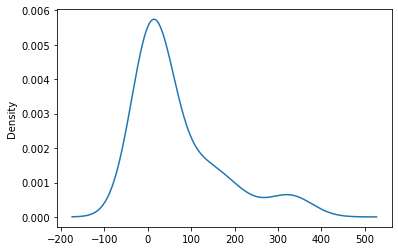

In [271]:
# Visualize the value counts
country_counts.plot.density()

**Summary** | Interpreting the output above

According to the density plot, the most common unique values have more than 100 instances within the dataset. Therefore, we can bucket any country that appears fewer than 100 times in the dataset as "other." To do this, we'll use a Python `for` loop and Pandas' `replace` method.

## Creating the "other" label

In [272]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country, "Other")
    
# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

**Transition** | OneHotEncoder

Now, transpose the variable using one-hot encoding. The easiest way to perform one-hot encoding in Python is to use Scikit-learn's `OneHotEncoder` module on the country variable. To build the encoded columns, we must create an instance of `OneHotEncoder` and "fit" the encoder with our values. 

## Build the Encoded Columns and Apply to Data

In [273]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename the encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head(20)

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [275]:
# Merge the two DataFrames, the encoded_df and the broader ramen_df

## Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df, left_index=True, right_index=True).drop("Country", 1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Summary** | Explaining what's immediately above

The process of bucketing and encoding are two of the most common preprocessing steps required to set up your neural network training datasets. As with many other data science techniques, it might seem complicated at first, but it will become easier with practice.

# 19.3.4 - Span the Gap Using Standardization

**We can train on raw data...**

Even though a neural network can train on raw numerical data, it does not mean that it should train on raw data. There are many reasons why a raw numeric variable is insufficient for use when training a neural network model, such as:

- Raw data often has outliers or extreme values that can artificially inflate a variable's importance.
- Numerical data can be measured using different units across a dataset—such as time versus temperature, or length versus volume.
- The distribution of a variable can be skewed, leading to misinterpretation of the central tendency.

**But this is what we should do instead.**
If we use the `StandardScaler` module to standardize our numerical variables, we reduce the overall likelihood that outliers, variables of different units, or skewed distributions will have a negative impact on a model's performance.